# Import

In [ ]:
a=1

In [ ]:
get_ipython().set_next_input("code")

In [ ]:
code

In [ ]:
s

In [ ]:
# %%

# %%

import dill
dill.load_session('notebook_env.db')


In [ ]:
a

In [ ]:
import ipynbname
ipynbname.name()

In [ ]:
import sys
sys.path

In [ ]:
import time
import os
path = os.path.abspath(time)

In [ ]:
!python --version

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

In [ ]:
%%javascript

function sayHello() {
    alert('Hello world!');
}

setTimeout(sayHello, 1000);

In [ ]:
from IPython.display import display, Javascript

# can have comments here :)
js_cmd = 'IPython.notebook.kernel.execute(\'nb_name = "\' + IPython.notebook.notebook_name + \'"\')'
display(Javascript(js_cmd))

In [ ]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + IPython.notebook.base_url + IPython.notebook.notebook_path + "'";
res=kernel.execute(command);

In [ ]:
IPython.notebook

In [ ]:
print(res.data)

In [ ]:
NOTEBOOK_FULL_PATH

In [ ]:
from IPython.display import display, Javascript
res=Javascript("alert('Works')")

In [ ]:
from IPython.display import display, Javascript
res=Javascript("NOTEBOOK_FULL_PATH = " + 'IPython.notebook.base_url'+ ' + ' +'IPython.notebook.notebook_path')


In [ ]:
print(res.data)

In [ ]:
NOTEBOOK_FULL_PATH 

In [ ]:
from IPython.display import display, Javascript
res=Javascript("NOTEBOOK_FULL_PATH = '" + 'IPython.notebook.base_url'+ '+' +'IPython.notebook.notebook_path' + "'")
"NOTEBOOK_FULL_PATH = '" + IPython.notebook.base_url + IPython.notebook.notebook_path + "'"

In [ ]:
NOTEBOOK_FULL_PATH 

In [ ]:
%lsmagic

In [ ]:
def get_notebook_name():
    """Execute JS code to save Jupyter notebook name to variable `notebook_name`"""
    from IPython.core.display import Javascript, display_javascript
    js = Javascript("""IPython.notebook.kernel.execute('notebook_name = "' + IPython.notebook.notebook_name + '"');""")
    return display_javascript(js)

def get_notebook_path():
    """Execute JS code to save Jupyter notebook path to variable `notebook_path`"""
    from IPython.core.display import Javascript, display_javascript
    js = Javascript("""IPython.notebook.kernel.execute('notebook_path = "' + IPython.notebook.notebook_path + '"');""")
    return display_javascript(js)

# execute javascript
get_notebook_name()
get_notebook_path()

In [ ]:
# print results
print(f"{notebook_name=}")
print(f"{notebook_path=}")

In [ ]:

import json
import os
import urllib
import IPython
from IPython.lib import kernel
connection_file_path = kernel.get_connection_file()
connection_file = os.path.basename(connection_file_path)
kernel_id = connection_file.split('-', 1)[1].split('.')[0]

# Updated answer with semi-solutions for both IPython 2.x and IPython < 2.x
if IPython.version_info[0] < 2:
    ## Not sure if it's even possible to get the port for the
    ## notebook app; so just using the default...
    notebooks = json.load(urllib.request.urlopen('http://127.0.0.1:8888/notebooks'))
    for nb in notebooks:
        if nb['kernel_id'] == kernel_id:
            print (nb['name'])
            break
else:
    sessions = json.load(urllib.request.urlopen('http://127.0.0.1:8888/api/sessions'))
    for sess in sessions:
        if sess['kernel']['id'] == kernel_id:
            print (sess['notebook']['name'])
            break

In [ ]:
import jupyterlab
if jupyterlab.__version__.split(".")[0] == "3":
    from jupyter_server import serverapp as app
    key_srv_directory = 'root_dir'
else : 
    from notebook import notebookapp as app
    key_srv_directory = 'notebook_dir'
import urllib
import json
import os
import ipykernel

def notebook_path(key_srv_directory, ):
    """Returns the absolute path of the Notebook or None if it cannot be determined
    NOTE: works only when the security is token-based or there is also no password
    """
    connection_file = os.path.basename(ipykernel.get_connection_file())
    kernel_id = connection_file.split('-', 1)[1].split('.')[0]

    for srv in app.list_running_servers():
        try:
            if srv['token']=='' and not srv['password']:  # No token and no password, ahem...
                req = urllib.request.urlopen(srv['url']+'api/sessions')
            else:
                req = urllib.request.urlopen(srv['url']+'api/sessions?token='+srv['token'])
            sessions = json.load(req)
            for sess in sessions:
                if sess['kernel']['id'] == kernel_id:
                    return os.path.join(srv[key_srv_directory],sess['notebook']['path'])
        except:
            pass  # There may be stale entries in the runtime directory 
    return None

In [ ]:
import os
import json
try:
    from urllib2 import urlopen
except:
    from urllib.request import urlopen
import ipykernel

connection_file_path = ipykernel.get_connection_file()
connection_file = os.path.basename(connection_file_path)
kernel_id = connection_file.split('-', 1)[1].split('.')[0]    
    
running_servers = !jupyter notebook list
running_servers = [s.split('::')[0].strip() for s in running_servers[1:]]
nb_name = '???'
for serv in running_servers:
    uri_parts = serv.split('?')
    uri_parts[0] += 'api/sessions'
    sessions = json.load(urlopen('?'.join(uri_parts)))
    for sess in sessions:
        if sess['kernel']['id'] == kernel_id:
            nb_name = os.path.basename(sess['notebook']['path'])
            break
    if nb_name != '???':
        break
print (f'[{nb_name}]')
    

In [ ]:
from IPython.display import display, Javascript

# can have comments here :)
js_cmd = 'IPython.notebook.kernel.execute(\'nb_name = "\' + IPython.notebook.notebook_name + \'"\')'
print(display(Javascript(js_cmd)))

In [ ]:
from jupyter_server import serverapp as app; 
import ipykernel, requests, os; 
kernel_id = os.path.basename(ipykernel.get_connection_file()).split('-', 1)[1].split('.')[0]; 
srv = next(app.list_running_servers());
nb_path = srv["root_dir"]+"/"+next(s for s in requests.get(srv['url']+'api/sessions?token='+srv['token']).json() if s["kernel"]["id"]==kernel_id)['notebook']['path']

In [ ]:
list(app.list_running_servers())

In [ ]:
ipykernel.get_connection_file()

In [ ]:
kernel_id

In [ ]:
import jp_proxy_widget

nb_name = None

def save_name(name):
    global nb_name
    nb_name = name

get_name = jp_proxy_widget.JSProxyWidget()
get_name.js_init("""
var name = IPython.notebook.notebook_name;
element.html("The name of the notebook is" + name);
save_name(name);
""", save_name=save_name)
get_name

In [ ]:
import json
import os.path
import re
import ipykernel
import requests

#try:  # Python 3
#    from urllib.parse import urljoin
#except ImportError:  # Python 2
#    from urlparse import urljoin

# Alternative that works for both Python 2 and 3:
from requests.compat import urljoin

try:  # Python 3 (see Edit2 below for why this may not work in Python 2)
    from notebook.notebookapp import list_running_servers
except ImportError:  # Python 2
    import warnings
    from IPython.utils.shimmodule import ShimWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ShimWarning)
        from IPython.html.notebookapp import list_running_servers


def get_notebook_name():
    """
    Return the full path of the jupyter notebook.
    """
    #kernel_id = re.search('kernel-(.*).json',ipykernel.connect.get_connection_file()).group(1)
    kernel_id = os.path.basename(ipykernel.get_connection_file()).split('-', 1)[1].split('.')[0] # or this
    
    servers = list_running_servers()
    for ss in servers:
        response = requests.get(urljoin(ss['url'], 'api/sessions'),
                                params={'token': ss.get('token', '')})
        for nn in json.loads(response.text):
            if nn['kernel']['id'] == kernel_id:
                relative_path = nn['notebook']['path']
                #return os.path.join(ss['notebook_dir'], relative_path)
                #return relative_path
                return relative_path.split("-")[0]

In [ ]:
print(get_notebook_name())

In [ ]:
os.path.basename(ipykernel.get_connection_file()).split('-', 1)[1].split('.')[0]; 

In [ ]:
ipykernel.connect.get_connection_file()

In [ ]:
import json
import os.path
import re
import ipykernel
import requests

#try:  # Python 3
#    from urllib.parse import urljoin
#except ImportError:  # Python 2
#    from urlparse import urljoin

# Alternative that works for both Python 2 and 3:
from requests.compat import urljoin

try:  # Python 3 (see Edit2 below for why this may not work in Python 2)
    from notebook.notebookapp import list_running_servers
except ImportError:  # Python 2
    import warnings
    from IPython.utils.shimmodule import ShimWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ShimWarning)
        from IPython.html.notebookapp import list_running_servers


def get_notebook_name():
    """
    Return the full path of the jupyter notebook.
    """
    kernel_id = os.path.basename(ipykernel.get_connection_file()).split('-', 1)[1].split('.')[0] # .group(1)?
    servers = list_running_servers()
    for ss in servers:
        response = requests.get(urljoin(ss['url'], 'api/sessions'),
                                params={'token': ss.get('token', '')})
        for nn in json.loads(response.text):
            if nn['kernel']['id'] == kernel_id:
                relative_path = nn['notebook']['path']
                return os.path.join(ss['notebook_dir'], relative_path)

In [ ]:
list(list_running_servers())

In [ ]:
!jupyter notebook list

In [ ]:
!jupyter --runtime-dir

In [ ]:
!ls -a /home/gabrielceron/.local/share/jupyter/runtime

In [ ]:
list(list_running_servers(runtime_dir='/home/gabrielceron/.local/share/jupyter/runtime/'))

In [ ]:
!sudo ls /run/user/

In [ ]:
!jupyter notebook list

In [ ]:
#24956
while(1):
    continue

# Import

In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [12]:
sys.platform

'linux'

In [1]:
#Run if you want to autoreload your personal modules on change
import autoreload
%load_ext autoreload
%autoreload 2

#Next is needed in azure vm to autoreload modules in cwd
import os
pwd=os.popen("pwd").read().rstrip()

import sys
sys.path.append(pwd)

In [2]:
import time
import log
def log_time(func,ad_info=""):
    def wrapper(*args, **kwargs):
        print()
        start = time.process_time()
        try:
            best_acc=func(*args, **kwargs)
            total=time.process_time() - start
            log.log("Exec time: " + str(total) + "best_acc: "  + str(best_acc) + " " + ad_info)
        except Exception as e:
            total=time.process_time() - start
            log.log("Exec time: " + str(total) + " ERROR: " + str(e) + " " + ad_info)
    return wrapper

In [17]:
#Show current devices (GPU)
#print(torch.cuda.current_device())
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [19]:
'''Train CIFAR10 with PyTorch.'''
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn


import torchvision
import torchvision.transforms as transforms

import os
import argparse

#from models import *
import utils
from utils import progress_bar
import time
from torchvision import models

import model_actions

In [ ]:

import sys
sys.path.append('C:\\Python39\\lib\\site-packages')

# Run

In [ ]:


%run main_custom


In [ ]:
#import resnet_18_custom
#Parameters:

# num_classes: int = 1000, # Output of Fully Connected layer
#norm_layer: Optional[Callable[..., nn.Module]] = None
#inplanes; in git resnet we also have default 64
#layer_stride
#layer_kernel_size

#model=resnet_18_custom.resnet18(num_classes=10,layer_stride=4)
default=models.resnet18(num_classes=10)

In [ ]:
# run instead of import because of parameters
%run main_custom

In [ ]:
epochs=200
model_desc="test_stride"
ad_info=" saved: " + model_desc + " epochs: " + str(epochs)
log_time(train_model,ad_info=ad_info)(model,epochs,model_desc)

In [ ]:
#Or use: from functools import partial; to bind function and arguments
log_time(train_model)(model,"test_time")


# Batch Size mod

In [ ]:
%run main_custom

In [ ]:
class MyGroupNorm(nn.Module):
    def __init__(self, num_channels):
        super(MyGroupNorm, self).__init__()
        self.norm = nn.GroupNorm(num_groups=2, num_channels=num_channels,
                                 eps=1e-5, affine=True)
    
    def forward(self, x):
        x = self.norm(x)
        return x

In [ ]:
model=resnet_18_custom.resnet18(num_classes=10)
default_gn=models.resnet18(num_classes=10,norm_layer=MyGroupNorm)
default=models.resnet18(num_classes=10)

In [ ]:
default_gn

In [ ]:
try:
    epochs=200
    model_desc="default_b_size_256"
    ad_info=" saved: " + model_desc + " epochs: " + str(epochs)
    log_time(train_model,ad_info=ad_info)(default,epochs,model_desc,t_batch_size=256)

    epochs=200
    model_desc="default_b_size_512"
    ad_info=" saved: " + model_desc + " epochs: " + str(epochs)
    log_time(train_model,ad_info=ad_info)(default,epochs,model_desc,t_batch_size=512)
except:
    pass
from az_manage_proc import delete
log.log("end")
delete()


In [4]:
model=models.resnet18(num_classes=10)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
optimizer = optim.SGD(model.parameters(), lr=0.1, #MOD: lr=args.lr,
                        momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
name="bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4"
run_and_delete(log.log_time,model_actions.progressive_train_3,model,300,name,20,criterion,scheduler)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18

Epoch: 19

Epoch: 20
Saving.. epoch: 20


Epoch: 21

Epoch: 22

Epoch: 23

Epoch: 24

Epoch: 25

Epoch: 26

Epoch: 27

Epoch: 28

Epoch: 29

Epoch: 30

Epoch: 31

Epoch: 32

Epoch: 33

Epoch: 34

Epoch: 35

Epoch: 36

Epoch: 37

Epoch: 38

Epoch: 39

Epoch: 40
Saving.. epoch: 40


Epoch: 41

Epoch: 42

Epoch: 43

Epoch: 44

Epoch: 45

Epoch: 46

Epoch: 47

Epoch: 48

Epoch: 49

Epoch: 50

Epoch: 51

Epoch: 52

Epoch: 53

Epoch: 54

Epoch: 55

Epoch: 56

Epoch: 57

Epoch: 58

Epoch: 59

Epoch: 60
Saving.. epoch: 60


Epoch: 61

Epoch: 62

Epoch: 63

Epoch: 64

Epoch: 65

Epoch: 66

Epoch: 67

Epoch: 68

Epoch: 69

Epoch: 70

Epoch: 71

Epoch: 72

Epoch: 73

Epoch: 74

Epoch: 75

Epoch: 76

Epoch: 77

Epoch: 78

Epoch: 79

Epoch: 80
Saving.. epoch: 80


Epoch

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


In [4]:
model=models.resnet18(num_classes=10)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
optimizer = optim.SGD(model.parameters(), lr=0.1, #MOD: lr=args.lr,
                        momentum=0.9, weight_decay=5e-4)

#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

#name="bs_1024_sch_cosine/bs_1024_sch_cosine"
name="bs_1024_sch_cosine/bs_1024_sch_cosine"
run_and_delete(log.log_time,model_actions.progressive_train_3,model,300,name,20,criterion,scheduler)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13


In [9]:
scheduler.__class__.__name__

'CosineAnnealingLR'

In [4]:
model=models.resnet18(num_classes=10)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


optimizer = optim.SGD(model.parameters(), lr=0.1, #MOD: lr=args.lr,
                        momentum=0.9, weight_decay=5e-4)

#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=4,threshold=1e-3)

#name="bs_1024_sch_cosine/bs_1024_sch_cosine"
name="bs_1024_sch_plateau/bs_1024_sch_plateau"
run_and_delete(log.log_time,model_actions.progressive_train_3,model,300,name,20,criterion,scheduler)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Train Test

In [ ]:
torch.cuda.is_available()

In [ ]:
%run main_custom
default=models.resnet18(num_classes=10)
default.train()

# Running call stack

In [ ]:
# def tracefunc(frame, event, arg, indent=[0]):
#       if event == "call":
#           indent[0] += 2
#           print("-" * indent[0] + "> call function", frame.f_code.co_name)
#       elif event == "return":
#           print("<" + "-" * indent[0], "exit function", frame.f_code.co_name)
#           indent[0] -= 2
#       return tracefunc

# import sys
# sys.setprofile(tracefunc)

# default.train()

In [ ]:
# def tracefunc(frame, event, arg, indent=[0]):
#       if event == "call":
#           indent[0] += 2
#           print("-" * indent[0] + "> call function", frame.f_code.co_name)
#       elif event == "return":
#           print("<" + "-" * indent[0], "exit function", frame.f_code.co_name)
#           indent[0] -= 2
#       return tracefunc

# import sys
# sys.setprofile(tracefunc)

# default.train()

In [13]:
print(sys.getprofile())

None


In [12]:
sys.setprofile(None)

In [6]:
from IPython.display import clear_output
window=5
c=0
def tracefunc(frame, event, arg, indent=[0]):
    # global c
    # c=c+1
    # if c==window:
    #     clear_output(wait=True)
    #     c=0
    if event == "call":
        indent[0] += 2
        print("|" * indent[0]+ ">", frame.f_code.co_name,end="\r")
    elif event == "return":
#       print("<" + "-" * indent[0], "exit function", frame.f_code.co_name)
        indent[0] -= 2
    return tracefunc

import sys
sys.setprofile(tracefunc)

print("test")

||||||||> _wait_for_tstate_lock


In [9]:
def clear(frame, event, arg, indent=[0]):
    pass
sys.setprofile(clear)

In [6]:
print("\r","Yo",end='\r')
print("\r","Yo")
print(end='\r')
from IPython.display import clear_output
clear_output(wait=True)
print("2")

2


In [ ]:
torch.cuda.is_available()

In [ ]:
epochs=1
model_desc="default_test"
ad_info=" saved: " + model_desc + " epochs: " + str(epochs)
log_time(train_model,ad_info=ad_info)(default,epochs,model_desc,t_batch_size=32)

# Train networks 10 classes

In [26]:
# utils.trace(False)
# print("Test")

In [3]:
default=models.resnet18(num_classes=10)

In [9]:
model_actions.train_model(default,epochs=1,save_folder="test_new")

Training
Files already downloaded and verified
==> Building model..

Epoch: 0


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 [================================================================>]  Step: 544ms | Tot: 4m49s | Loss: 2.058 | Acc: 31.464% (15732/50000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              3

39.8

In [12]:
model_actions.train_model_resume(default,epochs=2,save_folder="test_new_4",resume_folder="test_new_3")

Files already downloaded and verified
==> Preparing data..
Training
Files already downloaded and verified
==> Building model..
==> Resuming from checkpoint..

Epoch: 0
 [================================================================>]  Step: 4ms | Tot: 4ms | Loss: 1.128 | Acc: 59.996% (29998/50000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

65.49

In [4]:
model_actions.train_model_resume(default,epochs=1,save_folder="test_new_test_3")

Training
Files already downloaded and verified
==> Building model..

Epoch: 0


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 [================================================================>]  Step: 1ms | Tot: 1ms | Loss: 2.262 | Acc: 25.668% (12834/50000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  3

39.05

In [13]:
#reload

Files already downloaded and verified
==> Preparing data..
Files already downloaded and verified


In [4]:
from az_manage_proc import *

In [2]:
check_vm()

Found existing instance, use it.


True

In [2]:
#@log.exception_handler
def progressive_train(step,total,name):
    '''step,total(number of steps),name(checkpoints save folder name)'''
    model=models.resnet18(num_classes=10)
    name_i=name+"_epoch_"+str(step)
    name_i= name + "/" + name_i # create subfolder
    res_v={}

    res=log.log_save(name_i,model_actions.train_model_resume_noEarly,model,epochs=step,save_folder=name_i)
    #res=log.log_save_(model_actions.train_model_resume,name_i,model,epochs=step,save_folder=name_i)
    res_v=res
    print(res["test_acc_v"][-1])
    log.log("Epoch: "+str(step) + " Accuracy: " + str(res["test_acc_v"][-1]) + " Loss: " + str(res["test_loss_v"][-1]))

    for i in range(2,total+1):# 2 because of previos train

        name_i=name+"_epoch_"+str(step*i) #next name
        name_j=name+"_epoch_"+str(step*i - step) #prev name

        name_i= name + "/" + name_i # Create subfolder
        name_j= name + "/" + name_j

        res=log.log_save(name_i,model_actions.train_model_resume_noEarly,model,epochs=step,save_folder=name_i,resume_folder=name_j)
        print(res["test_acc_v"][-1])
        log.log("Epoch: "+str(step*i) + " Accuracy: " + str(res["test_acc_v"][-1]) + " Loss: " + str(res["test_loss_v"][-1]))

        #append all results
        res_v["test_acc_v"].extend(res["test_acc_v"])
        res_v["test_loss_v"].extend(res["test_loss_v"])
        res_v["train_acc_v"].extend(res["train_acc_v"])
        res_v["train_loss_v"].extend(res["train_loss_v"])

    log.save(res_v,name)
    
    return res_v


In [13]:
y=[1,[2,3]]
print([1,2])

[1, 2]


In [16]:
y[1]

[2, 3]

In [24]:
x=1
y=2
z=3

In [11]:
eval("x")

1

In [27]:
d={i:eval(i) for i in ["x","y","z"]}

In [28]:
d["x"]

1

In [8]:
from az_manage_proc import *

In [10]:
name="default_bs_128"
run_and_delete_(log.log_time,progressive_train,20,15,name)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18

Epoch: 19

Epoch: 20
Saving.. epoch: 20

73.0
Training

Resuming..
Resumed epoch: 21


Epoch: 21

Epoch: 22

Epoch: 23

Epoch: 24

Epoch: 25

Epoch: 26

Epoch: 27


In [3]:
name="default_bs_128_v2/default_bs_128_v2"
model=models.resnet18(num_classes=10)
run_and_delete_(log.log_time,model_actions.progressive_train_2,model,300,name,20)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18

Epoch: 19

Epoch: 20
Saving.. epoch: 20


Epoch: 21

Epoch: 22

Epoch: 23

Epoch: 24

Epoch: 25

Epoch: 26

Epoch: 27

Epoch: 28

Epoch: 29

Epoch: 30

Epoch: 31

Epoch: 32

Epoch: 33

Epoch: 34

Epoch: 35

Epoch: 36

Epoch: 37

Epoch: 38

Epoch: 39

Epoch: 40
Saving.. epoch: 40


Epoch: 41

Epoch: 42

Epoch: 43

Epoch: 44

Epoch: 45

Epoch: 46

Epoch: 47

Epoch: 48

Epoch: 49

Epoch: 50

Epoch: 51

Epoch: 52

Epoch: 53

Epoch: 54

Epoch: 55

Epoch: 56

Epoch: 57

Epoch: 58

Epoch: 59

Epoch: 60
Saving.. epoch: 60


Epoch: 61

Epoch: 62

Epoch: 63

Epoch: 64

Epoch: 65

Epoch: 66

Epoch: 67

Epoch: 68

Epoch: 69

Epoch: 70

Epoch: 71

Epoch: 72

Epoch: 73

Epoch: 74

Epoch: 75

Epoch: 76

Epoch: 77

Epoch: 78

Epoch: 79

Epoch: 80
Saving.. epoch: 80


Epoch

In [2]:
name="test/test"
model=models.resnet18(num_classes=10)
run_and_delete_test_(log.log_time,model_actions.progressive_train_2,model,4,name,2)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2
Saving.. epoch: 2


Epoch: 3

Epoch: 4
Saving.. epoch: 4

Deleting VM


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Train Pytorch

In [3]:

!pip install ipykernel --upgrade
!python -m pip install pip --upgrade

  Using cached parso-0.8.2-py2.py3-none-any.whl (94 kB)
  Attempting uninstall: parso
    Found existing installation: parso 0.7.0
    Uninstalling parso-0.7.0:
      Successfully uninstalled parso-0.7.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.0.2
    Uninstalling ipykernel-6.0.2:
      Successfully uninstalled ipykernel-6.0.2
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1


In [ ]:
%run train_pytorch.py

In [2]:
import utils
import log

In [ ]:
utils.trace(True)

In [2]:
while(1):
    pass

Type help() for interactive help, or help(object) for help about object.

Welcome to Python 3.9's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.9/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".


You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the hel

# Train Personalized Schedule

In [37]:
net=models.resnet18(num_classes=10)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

model_actions.progressive_train_3(net,epochs=5,save_folder="test_progressive3/test_progressive3",criterion=criterion,scheduler=plateau_lr_scheduler, step=2)

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
Training


Epoch: 1

Epoch: 2
Saving.. epoch: 2


Epoch: 3

Epoch: 4
Saving.. epoch: 4


Epoch: 5


{'train_acc_v': [31.598, 44.928, 52.114, 57.858, 61.908],
 'train_loss_v': [2.0182601034927368,
  1.5007746765136718,
  1.320865361213684,
  1.178256960105896,
  1.0680373552703857],
 'test_acc_v': [42.74, 51.65, 54.56, 61.58, 63.74],
 'test_loss_v': [1.5700496077537536,
  1.2949618947505952,
  1.2730347537994384,
  1.0884946280717849,
  1.015749061703682],
 'current_lr_v': [0.1, 0.1, 0.1, 0.1, 0.1],
 'parameters': "{'batch_size': 128, 'n_workers': 2, 'optimizer': {'class': <class 'torch.optim.sgd.SGD'>, 'dict': {'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}}, 'scheduler': {'class': <class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>, 'dict': {'factor': 0.1, 'optimizer': SGD (\nParameter Group 0\n    dampening: 0\n    lr: 0.1\n    momentum: 0.9\n    nesterov: False\n    weight_decay: 0\n), 'min_lrs': [0], 'patience': 3, 'verbose': False, 'cooldown': 0, 'cooldown_counter': 0, 'mode': 'min', 'threshold': 0.0001, 'threshold_mode': 'rel', 'best': 1.0157

In [2]:
model=models.resnet18(num_classes=10)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)


name="default_bs_128_sch_plateau/default_bs_128_sch_plateau"
run_and_delete_(log.log_time,model_actions.progressive_train_3,model,300,name,20,criterion,plateau_lr_scheduler)

Found existing instance, use it.
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Graph results

In [5]:
loaded=log.load("default_bs_128_sch_plateau.json")

In [8]:
from matplotlib import pyplot as plt

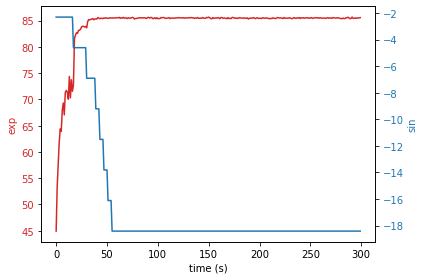

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [3]:
loaded=log.load("bs_64_sch_cosine_wd_5e-4.json")

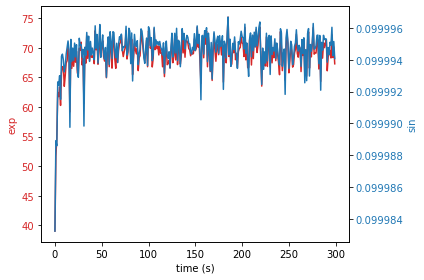

In [4]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(loaded["current_lr_v"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [2]:
loaded=log.load("bs_1024_sch_cosine.json")

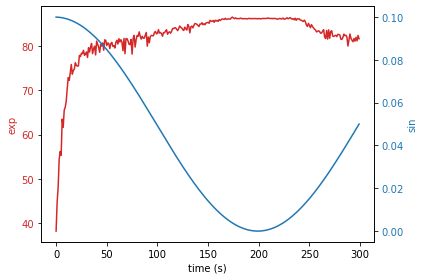

In [3]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(loaded["current_lr_v"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

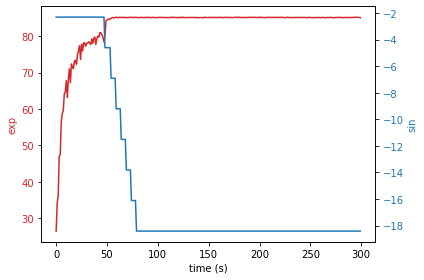

In [4]:
loaded=log.load("bs_1024_sch_plateau.json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()